### Deliverable 3: Optimize the Model

In [ ]:
# Import dependencies and charity_data.csv. 
# Then, repeat data preprocessing steps before optimizing model metrics.

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Try reintroducing the 'NAME' columns by removing it from the drop function.
application_df.drop('EIN', axis=1, inplace=True)
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Investigate how many times each organization applied by NAME value_counts
name_counts = application_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot: ylabel='Density'>

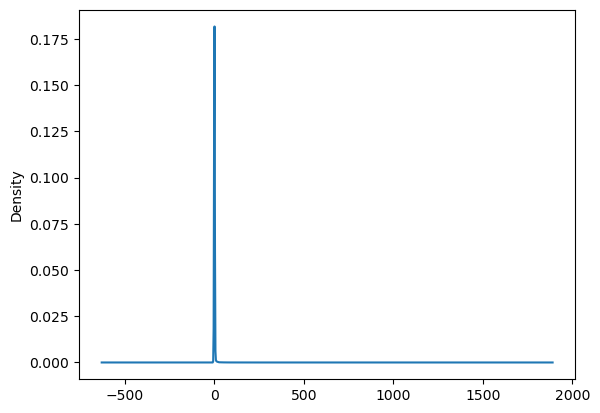

In [6]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 2
# All names that didn't apply more than once will be binned in 'Other'
replace_name = list(name_counts[name_counts < 2].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [8]:
# Investigate potential class imbalance in SPECIAL_CONSIDERATIONS column value counts
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [9]:
# Drop SPECIAL_CONSIDERATIONS column
application_df.drop('SPECIAL_CONSIDERATIONS', axis=1, inplace=True)
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [10]:
# Investigate AFFILIATION column value counts
affiliation_counts = application_df['AFFILIATION'].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot: ylabel='Density'>

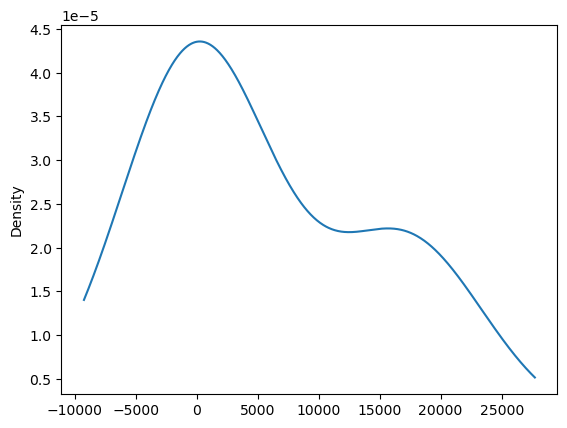

In [11]:
# Visualize the value counts of AFFILIATION
affiliation_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than 5000
replace_affiliation = list(affiliation_counts[affiliation_counts < 5000].index)

# Replace in dataframe
for affiliation in replace_affiliation:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(affiliation,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [13]:
# Investigate USE CASE column value counts
use_case_counts = application_df['USE_CASE'].value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot: ylabel='Density'>

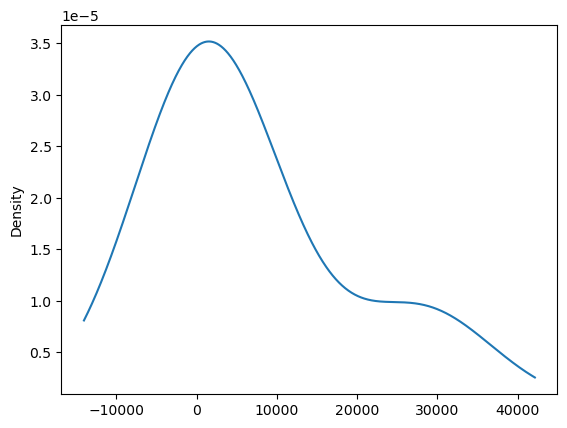

In [14]:
# Visualize the value counts of USE_CASE
use_case_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than 5000
replace_use_case = list(use_case_counts[use_case_counts < 5000].index)

# Replace in dataframe
for use_case in replace_use_case:
    application_df.USE_CASE = application_df.USE_CASE.replace(use_case,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [16]:
# Investigate ORGANIZATION column value counts
organization_counts = application_df['ORGANIZATION'].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot: ylabel='Density'>

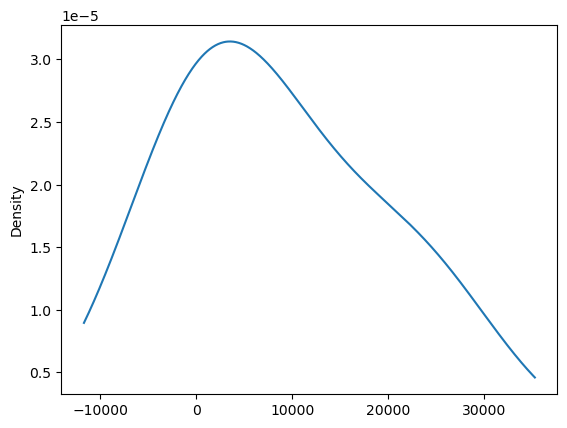

In [17]:
# Visualize the value counts of ORGANIZATION
organization_counts.plot.density()

In [18]:
# Determine which values to replace if counts are less than 5000
replace_organization = list(organization_counts[organization_counts < 5000].index)

# Replace in dataframe
for organization in replace_organization:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(organization,"Other")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64

In [19]:
# Investigate potential class imbalance in STATUS column value counts
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [20]:
# Drop STATUS column
application_df.drop('STATUS', axis=1, inplace=True)
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [21]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: ylabel='Density'>

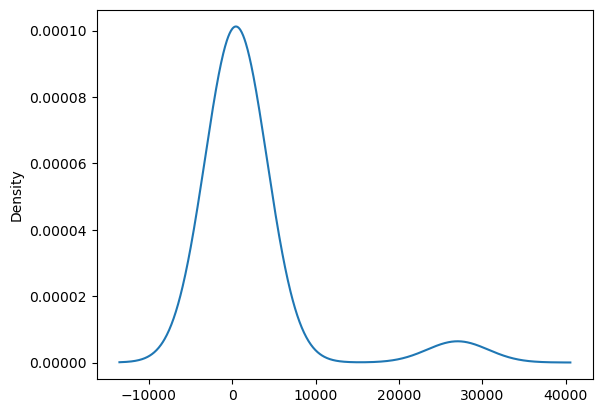

In [22]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [23]:
# Determine which values to replace if counts are less than 500
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot: ylabel='Density'>

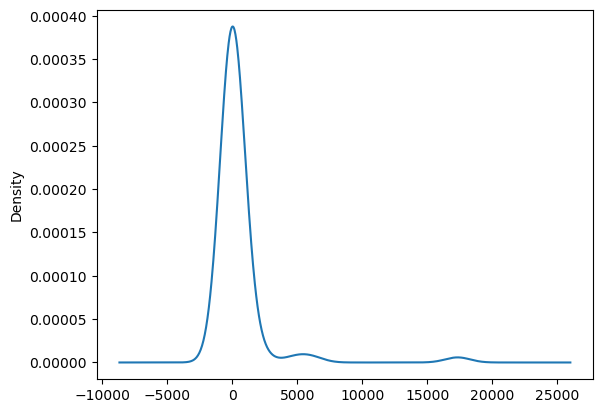

In [25]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [26]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df.drop(application_cat, axis=1, inplace=True)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
len(X_train.columns)

827

### Optimization Trial 1

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 1650
hidden_nodes_layer2 = 825

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1650)              1366200   
                                                                 
 dense_1 (Dense)             (None, 825)               1362075   
                                                                 
 dense_2 (Dense)             (None, 1)                 826       
                                                                 
Total params: 2,729,101
Trainable params: 2,729,101
Non-trainable params: 0
_________________________________________________________________


2022-10-30 15:06:43.079431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-30 15:06:43.079827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization1/", exist_ok=True)
checkpoint_path = "checkpoints_optimization1/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [36]:
# Train the model
fit_model = nn1.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100


2022-10-30 15:06:43.419626: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-30 15:06:43.583405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 7s 9ms/step - loss: 0.4778 - accuracy: 0.7836
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.4225 - accuracy: 0.8017
Epoch 3/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4188 - accuracy: 0.8042
Epoch 4/100
804/804 [==============================] - 8s 10ms/step - loss: 0.4151 - accuracy: 0.8049
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8065
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.4129 - accuracy: 0.8064
Epoch 6/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4112 - accuracy: 0.8061
Epoch 7/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4122 - accuracy: 0.8073
Epoch 8/100
804/804 [==============================] - 7s 9ms/step - loss: 0.4097 - accuracy: 0.8069
Epoch 9/100
804/804 [==============================

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:18:37.356573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 2s - loss: 2.8988 - accuracy: 0.8012 - 2s/epoch - 6ms/step
Loss: 2.898818016052246, Accuracy: 0.8011661767959595


### Optimization Trial 2

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 1100
hidden_nodes_layer2 = 550

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1100)              910800    
                                                                 
 dense_4 (Dense)             (None, 550)               605550    
                                                                 
 dense_5 (Dense)             (None, 1)                 551       
                                                                 
Total params: 1,516,901
Trainable params: 1,516,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization2/", exist_ok=True)
checkpoint_path = "checkpoints_optimization2/weights.{epoch:02d}.hdf5"

In [40]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [41]:
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:12 - loss: 0.7019 - accuracy: 0.5938

2022-10-30 15:18:39.059372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 7s 9ms/step - loss: 0.4795 - accuracy: 0.7834
Epoch 2/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4235 - accuracy: 0.8017
Epoch 3/100
804/804 [==============================] - 7s 9ms/step - loss: 0.4170 - accuracy: 0.8055
Epoch 4/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4140 - accuracy: 0.8060
Epoch 5/100
799/804 [============================>.] - ETA: 0s - loss: 0.4136 - accuracy: 0.8060
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.4136 - accuracy: 0.8061
Epoch 6/100
804/804 [==============================] - 6s 8ms/step - loss: 0.4115 - accuracy: 0.8074
Epoch 7/100
804/804 [==============================] - 6s 8ms/step - loss: 0.4108 - accuracy: 0.8071
Epoch 8/100
804/804 [==============================] - 6s 8ms/step - loss: 0.4099 - accuracy: 0.8074
Epoch 9/100
804/804 [==============================]

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:28:28.836882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 1.7730 - accuracy: 0.7981 - 1s/epoch - 4ms/step
Loss: 1.77295982837677, Accuracy: 0.7981340885162354


### Optimization Trial 3

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 400
hidden_nodes_layer2 = 200

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               331200    
                                                                 
 dense_7 (Dense)             (None, 200)               80200     
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 411,601
Trainable params: 411,601
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization3/", exist_ok=True)
checkpoint_path = "checkpoints_optimization3/weights.{epoch:02d}.hdf5"

In [45]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [46]:
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  9/804 [..............................] - ETA: 5s - loss: 0.7326 - accuracy: 0.6319  

2022-10-30 15:28:30.321813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 5s 6ms/step - loss: 0.4713 - accuracy: 0.7838
Epoch 2/100
804/804 [==============================] - 4s 6ms/step - loss: 0.4201 - accuracy: 0.8039
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4155 - accuracy: 0.8052
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4116 - accuracy: 0.8052
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.4103 - accuracy: 0.8067
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4105 - accuracy: 0.8066
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4093 - accuracy: 0.8081
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4089 - accuracy: 0.8083
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4081 - accuracy: 0.8092
Epoch 9/100
804/804 [==============================]

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:35:50.183070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 1.1420 - accuracy: 0.7974 - 988ms/epoch - 4ms/step
Loss: 1.1419895887374878, Accuracy: 0.797434389591217


### Optimization Trial 4

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 102
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 16

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 102)               84456     
                                                                 
 dense_10 (Dense)            (None, 18)                1854      
                                                                 
 dense_11 (Dense)            (None, 16)                304       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 86,631
Trainable params: 86,631
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization4/", exist_ok=True)
checkpoint_path = "checkpoints_optimization4/weights.{epoch:02d}.hdf5"

In [50]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [51]:
# Train the model
fit_model = nn4.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  9/804 [..............................] - ETA: 5s - loss: 0.7605 - accuracy: 0.6285  

2022-10-30 15:35:51.638245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 4s 5ms/step - loss: 0.4732 - accuracy: 0.7818
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4209 - accuracy: 0.8030
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4146 - accuracy: 0.8052
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4118 - accuracy: 0.8066
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.4092 - accuracy: 0.8095
Epoch 5: saving model to checkpoints_optimization4/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4096 - accuracy: 0.8092
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4080 - accuracy: 0.8082
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4082 - accuracy: 0.8082
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4071 - accuracy: 0.8096
Epoch 9/100
804/804 [==============================]

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:42:43.274866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 0.4765 - accuracy: 0.8001 - 1s/epoch - 4ms/step
Loss: 0.47649815678596497, Accuracy: 0.8001165986061096


### Optimization Trial 5

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 400
hidden_nodes_layer2 = 200

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="gelu")
)

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 400)               331200    
                                                                 
 dense_14 (Dense)            (None, 200)               80200     
                                                                 
 dense_15 (Dense)            (None, 1)                 201       
                                                                 
Total params: 411,601
Trainable params: 411,601
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization5/", exist_ok=True)
checkpoint_path = "checkpoints_optimization5/weights.{epoch:02d}.hdf5"

In [55]:
# Compile the model
nn5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [56]:
# Train the model
fit_model = nn5.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100


2022-10-30 15:42:44.978841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 5s 6ms/step - loss: 0.4756 - accuracy: 0.7848
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4206 - accuracy: 0.8033
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4151 - accuracy: 0.8044
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4133 - accuracy: 0.8056
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8068
Epoch 5: saving model to checkpoints_optimization5/weights.05.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.4099 - accuracy: 0.8068
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4090 - accuracy: 0.8064
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4090 - accuracy: 0.8082
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4077 - accuracy: 0.8080
Epoch 9/100
804/804 [==============================]

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:50:26.348808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 2.5861 - accuracy: 0.7980 - 927ms/epoch - 3ms/step
Loss: 2.586108922958374, Accuracy: 0.7980175018310547


### Optimization Trial 6

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn6 = tf.keras.models.Sequential()

# First hidden layer
nn6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                66240     
                                                                 
 dense_17 (Dense)            (None, 30)                2430      
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 68,701
Trainable params: 68,701
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization6/", exist_ok=True)
checkpoint_path = "checkpoints_optimization6/weights.{epoch:02d}.hdf5"

In [60]:
# Compile the model
nn6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [61]:
# Train the model
fit_model = nn6.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
 10/804 [..............................] - ETA: 4s - loss: 0.7532 - accuracy: 0.6250  

2022-10-30 15:50:27.673118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 4s 5ms/step - loss: 0.4693 - accuracy: 0.7862
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4201 - accuracy: 0.8029
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4141 - accuracy: 0.8052
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4118 - accuracy: 0.8056
Epoch 5/100
798/804 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8075
Epoch 5: saving model to checkpoints_optimization6/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.4091 - accuracy: 0.8075
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4085 - accuracy: 0.8080
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4069 - accuracy: 0.8085
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4065 - accuracy: 0.8094
Epoch 9/100
804/804 [==============================]

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 15:56:44.468354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 0.4844 - accuracy: 0.8002 - 907ms/epoch - 3ms/step
Loss: 0.48437389731407166, Accuracy: 0.8002332448959351


### Optimization Trial 7

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 1650

nn7 = tf.keras.models.Sequential()

# First hidden layer
nn7.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Output layer
nn7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1650)              1366200   
                                                                 
 dense_20 (Dense)            (None, 1)                 1651      
                                                                 
Total params: 1,367,851
Trainable params: 1,367,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization7/", exist_ok=True)
checkpoint_path = "checkpoints_optimization7/weights.{epoch:02d}.hdf5"

In [65]:
# Compile the model
nn7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [66]:
# Train the model
fit_model = nn7.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  8/804 [..............................] - ETA: 6s - loss: 0.6475 - accuracy: 0.6484  

2022-10-30 15:56:45.774700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


804/804 [==============================] - 5s 6ms/step - loss: 0.5639 - accuracy: 0.7805
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4529 - accuracy: 0.7994
Epoch 3/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4452 - accuracy: 0.8006
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4404 - accuracy: 0.8018
Epoch 5/100
803/804 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8016
Epoch 5: saving model to checkpoints_optimization7/weights.05.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.4400 - accuracy: 0.8017
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4561 - accuracy: 0.8016
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4379 - accuracy: 0.8037
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4510 - accuracy: 0.8033
Epoch 9/100
804/804 [==============================]

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-30 16:05:05.991700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 4.9360 - accuracy: 0.7967 - 842ms/epoch - 3ms/step
Loss: 4.9359917640686035, Accuracy: 0.7967346906661987


In [69]:
# Export our model to HDF5 file
nn4.save("AlphabetSoupCharity_Optimization.h5")